# Topic Modeling

- El *topic modeling* es una técnica para extraer los temas "ocultos" que hay en un conjunto de textos o corpus.

- Es una técnica no supervisada.

- Aplicaciones: selección de temas automático de diferentes elementos: tweets, artículos, etc.

- La técnicas más usadas para extracción de temas son

    - ***LSI:*** Latent Semantic Index

    -***LDA***: Latent Dirichlet Allocation

    - ***PLSI:*** Probabilistic Latent Semantic Index

- Este método consiste en buscar factores que representen a las palbaras y documentos del corpus. A estos factores, se les da el nombre de **factores latentes**

- Buscamos: 

   - Relación entre documentos

   - Relación entre palabras

   - Extraer los temas




Para hacer lo anterior debemos representar el corpus mediante una matriz, que como hemos visto, se hace por medio de una **bolsa de palabras** así:

- **Fila:** representa cada documento.

- **Columna:** representa cada palabra.

- **Entrada $(i,j):$** número de veces que se repite la palabra en el documento.

**Obs:** La matriz no necesariamente es cuadrada.

Lo que buscamos es hacer una descomposición de la forma:

$$\begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & Corpus &  &  & \\ 
 &  &  & _{nxm} &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} =  \begin{bmatrix}
\: \\ 
\: \\ 
  Documentos\\ 
  _{nxK}\\ 
\:
\end{bmatrix} \cdot \begin{bmatrix} 
  Palabras\\ 
  _{Kxm}\\ 
\end{bmatrix}$$

con

$$\left\{ \begin{matrix}
n: Número \: de \: Documentos\\ 
m: Número \: de \: Palabras\\ 
K: Número \: de \: Factores \: Latentes
\end{matrix}\right.$$


# Vamos a ver un ejemplo numérico

* Consideremos matriz que representa una Bolsa de Palabras con:

    - Las filas representan a los documentos ($n$ documentos)

    - Las columnas representan a las palabras ($m$ palabras)
    
    
* Podemos descomponer esa matriz en tres matrices ***U***, ***S*** y ***V***, cuyo producto matricial es la matriz original ***A***.

$$\begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & A &  &  & \\ 
 &  &  & _{nxm} &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} =  \begin{bmatrix}
 &  &  &  & \\ 
 &  &  &  & \\ 
 &  & U &  & \\ 
 &  & _{nxn} &  & \\ 
 &  &  &  & 
\end{bmatrix} \cdot \begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & S &  &  & \\ 
 &  &  & _{nxm} &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} \cdot \begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & V^{t} &  &  & \\ 
 &  &  & _{mxm} &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} $$


* Cada una de estas matrices contiene la siguiente información:

    * ***Matriz U***: Contiene los valores de los ***factores latentes de las palabras***.
    * ***Matriz V***: Contiene los valores de los ***factores latentes de los documentos***.
    * ***Matriz S***: Matriz en cuya diagonal estan los llamados ***Valores singulares*** que tienen que ser valores decrecientes y no negativos. Los valores de la diagonal representan la importancia que tienen cada uno de los factores latentes de las palabras y de los documentos.

<hr>

# Cálculo Analítico: de las matrices U, S y V

### Para calcular la matriz U.

1. Se multiplica la matriz ***A*** por su traspuesta (***$A. A^{T}$***) para obtener una matriz cuadrada de dimensión ***nxn***


2. Se calculan los autovalores de la matriz cuadrada (***$A_1 = A. A^{T}$***) usando el polínomio característico:

$$det(A_{1}-\lambda I) = 0$$


3. Se calculan los autovectores asociados a cada autovalor (en orden decreciente por autovalor)


### Para calcular la matriz $S$


1. Una vez hayamos calculado los autovalores de $A_1$, se pone en la diagonal de la matriz ***$S$*** la raiz cuadrada del los autovalores en orden decreciente. El resto de elementos de la matriz ***$S$*** tendrán valor ***$0$***


### Cálculo de la matriz V

1. Se multiplica ***$A_2 = A^{T}A$*** para obtener una matriz cuadrada de dimensión ***mxm***


2. Se calculan los autovectores asociados a cada autovalor (ya calculados) en orden descendente.

$$det(A_{2}-\lambda I) = 0$$

<hr>


# Ejemplo 
Hallar $U$ , $V$ y $S$

$$A = \begin{bmatrix}
2 & 3 & 0 \\
1 & 0 & 1
\end{bmatrix}$$


# Ejemplo de ilustración básico

Consideremos los siguientes documentos

- **doc1:** petro petro reforma ovnis

- **doc1:** petro reforma reforma reforma

- **doc1:** marzo marzo universo ovnis

- **doc1:** universo universo marzo

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

documentos = ['petro petro reforma ovnis',
             'petro reforma reforma reforma',
             'marzo marzo universo ovnis',
             'universo universo marzo']

# vamos a vectorizar
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(documentos)

# Creamos el data.frame
pd.DataFrame(matrix.toarray(), index=['doc 1', 'doc 2', 'doc 3', 'doc 4'], columns=vectorizer.get_feature_names_out()).head()


,marzo,ovnis,petro,reforma,universo
doc 1,0,1,2,1,0
doc 2,0,0,1,3,0
doc 3,2,1,0,0,1
doc 4,1,0,0,0,2


- Para obtener los *factores latentes* vamos a realizar la ***SVD*** (descomposición en valores singulares).

- Cuando aplicamos este método tenemos tres matrices: $U$, $V$, $S$.

- Aplicamos los siguiente:

   - ***Factores latentes de los documentos*** = $U · S$

   - ***Factores latentes de las palabras*** = $S · V$

In [2]:
from sklearn.decomposition import TruncatedSVD
# para colocar solo dos decimales
pd.options.display.float_format = '{:,.2f}'.format

svd = TruncatedSVD(n_components=2)
U_S = svd.fit_transform(matrix)

# Resultados
pd.DataFrame(U_S, index=['doc 1', 'doc 2', 'doc 3', 'doc 4'], columns=['Factor 1', 'Factor 2']).head()

,Factor 1,Factor 2
doc 1,2.07,0.04
doc 2,3.00,-0.43
doc 3,0.37,2.29
doc 4,0.18,2.02


¿Qué podemos decir?

In [3]:

import numpy as np

V_S = np.dot(np.diag(svd.singular_values_), svd.components_)

# Resultados
pd.DataFrame(V_S, index=['Factor 1', 'Factor 2'], columns=vectorizer.get_feature_names_out()).head()

,marzo,ovnis,petro,reforma,universo
Factor 1,0.25,0.67,1.95,3.02,0.20
Factor 2,2.14,0.76,-0.11,-0.41,2.05


¿Qué podemos decir?

# Método LSI :  Latent Semantic Index

El ***LSI*** es una técnica de factorización matricial que se aplica en Procesamiento de Lenguaje Natural que busca analizar  las relaciones entre los documentos de un corpus y las palabras. 


* El ***LSI*** asume que las palabras que tienen un significado similar, aparecerán en partes de documentos similares.


* El ***LSI*** tiene como finalidad extraer una serie de factores latentes que caractericen a los documentos y las palabras del corpus.


* Necesitaremos una matriz de frecuencias que represente el número de veces que aparecen las palabras en los documentos:

    - ***Filas***: Cada fila representa a una palabra.

    - ***Columnas***: Cada columna representa a un documento.
  
    - ***Entrada $(i,j)$***: Cada entrada $(i,j)$ representa el número de veces que aparece la palabra en el documento.
    
    
* El LSI descompone una matriz **$A$** (de frecuencias); que esta formada por el número de apariciones de cada palabra en cada documento, en tres matrices **$U$** , **$V$**, **$S$** cuyo producto matricial es igual a la matriz original **$A$**: 


$$ SVD(A) = U \cdot S \cdot V^{t}$$


* Donde cada una de estas matrices contiene la siguiente información:

    - ***Matriz $U$*** contiene los valores de los ***factores latentes de las palabras***. 

    - ***Matriz $V$*** contiene los valores de los ***factores latentes de los documentos***.

    - ***Matriz $S$*** es una matriz en cuya diagonal están los llamados valores singulares que son decrecientes y no negativos. Esta matriz representa la ***importancia que tiene cada uno de los factores latentes de las palabras y de los documentos***. 
    
    
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/lsi.png?raw=true" alt="centered image" width="500" height="150"></center>


* Como la matriz ***$S$*** nos informa de la importancia que tiene cada uno de los factores latentes, podemos coger solo los ***K-factores más importantes*** para caracterizar cada una de las palabras y de los items. 


* De esta forma se trabaja con matrices más reducidas lo que nos permite comprimir la información de la matriz de apariciones.


* El SVD tiene una propiedad muy importante que viene dada por el ***teorema de Eckart-Young***, que afirma que la mejor aproximación a la matriz ***$A$*** la obtenemos poniendo a ceros los ***$k$*** valores singulares de menor a mayor valor; es decir, reduciendo la matriz ***$S$***. Por tanto si multiplicamos las submatrices ***$U$*** , ***$S$*** y ***$V$*** obtenemos matriz ***$A'$*** de rango ***$k$*** que mejor aproxima (de acuerdo con la norma de Frobenius) a la matriz ***$A$***.

$$\|A \|_{F}= \left( \sum \limits_{i=1}^{m} \sum \limits_{j=1}^{n} |a_{ij}|^2 \right)^{1/2} $$

<img src="./imgs/016_LSI_Matrix_reduc.png" style="width: 800px;"/>

* El valor de ***$k$***, va a representar el número de temas en que vamos a dividir (o Clusterizar) nuestro corpus, por lo tanto la selección del número de temas es un valor que tenemos que definir previamente 

* Para poder trabajar en la extracción de tópicos y ver las relaciones entre los documentos y las palabras, vamos trabajar con las matrices:

    - ***$U_k$***: Estudiar las relaciones entre palabras
    - ***$V_k$***: Estudiar las relaciones entre documentos
    - ***$k$***: Número de temas que tendrá a priori el Corpus
    

# Ejemplo

Tenemos el siguiente documento

In [4]:
documento = ["juego juego juego soccer soccer campeonato campeonato campeonato ronaldo ronaldo ronaldo ronaldo ronaldo messi",
      "soccer soccer soccer soccer soccer ronaldo ronaldo ronaldo ronaldo messi messi",
      "juego juego soccer soccer soccer soccer soccer soccer soccer messi messi messi messi messi",
      "educacion educacion educacion educacion MEN MEN MEN MEN MEN MEN gaviria gaviria gaviria gaviria gaviria",
      "educacion educacion educacion educacion MEN MEN MEN deuda deuda deuda deuda colegios colegios colegios gaviria",
      "educacion educacion educacion educacion deuda deuda deuda deuda deuda deuda colegios colegios colegios colegios colegios",
      "dinero fmi fmi fmi fmi fmi ue ue ue ue pib pib pib ibex ibex",
      "colegios gaviria dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ue pib",
      "MEN deuda colegios gaviria dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ",
      "soccer educacion pib",
      "soccer colegios campeonato gaviria"]


este trata tres temas a saber: soccer, educación, economía

In [5]:
# para imprimir de otra forma
from pprint import pprint
# diccionario de gensim
from gensim import corpora
from collections import defaultdict

# Tokenizamos
documents = [word.split() for word in documento]

# Creamos el diccionario (vocabulario)
frequency = defaultdict(int)
for doc in documents:
    for token in doc:
        frequency[token] += 1
        
documents = [[token for token in doc] for doc in documents]
dictionary = corpora.Dictionary(documents)
print('Diccionario:')
pprint(dictionary.token2id)

# Creamos la Bolsa de Palabras
corpus = [dictionary.doc2bow(doc) for doc in documents]
print('\nBolsa de Palabras:')
pprint(corpus)

Diccionario:
{'MEN': 5,
 'campeonato': 0,
 'colegios': 8,
 'deuda': 9,
 'dinero': 10,
 'educacion': 6,
 'fmi': 11,
 'gaviria': 7,
 'ibex': 12,
 'juego': 1,
 'messi': 2,
 'pib': 13,
 'ronaldo': 3,
 'soccer': 4,
 'ue': 14}

Bolsa de Palabras:
[[(0, 3), (1, 3), (2, 1), (3, 5), (4, 2)],
 [(2, 2), (3, 4), (4, 5)],
 [(1, 2), (2, 5), (4, 7)],
 [(5, 6), (6, 4), (7, 5)],
 [(5, 3), (6, 4), (7, 1), (8, 3), (9, 4)],
 [(6, 4), (8, 5), (9, 6)],
 [(10, 1), (11, 5), (12, 2), (13, 3), (14, 4)],
 [(7, 1), (8, 1), (10, 4), (11, 4), (13, 1), (14, 4)],
 [(5, 1), (7, 1), (8, 1), (9, 1), (10, 4), (11, 4), (14, 3)],
 [(4, 1), (6, 1), (13, 1)],
 [(0, 1), (4, 1), (7, 1), (8, 1)]]


# Creación del modelo

- La librería Gensim tiene ***LSI*** en **LSiModel**

- Requerimos

   - Corpus

   - Número de temas

   - Diccionario o vocabulario del corpus

In [6]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=corpus, num_topics=3, id2word=dictionary)

- Vamos a ver la matriz ***$U$***

- Esta matriz tiene los ***factores latentes de cada una de las palabras***

In [7]:
U_matrix = lsi_model.projection.u
U_matrix

array([[ 0.0080157 , -0.12147793, -0.00477548],
       [ 0.00764122, -0.23838329, -0.01351154],
       [ 0.01436787, -0.44343298, -0.02506618],
       [ 0.01216459, -0.38311209, -0.02178312],
       [ 0.03238081, -0.76194106, -0.03952318],
       [ 0.34610872,  0.00491806,  0.20925565],
       [ 0.45080378, -0.00342558,  0.35923484],
       [ 0.26841352,  0.00105663,  0.07889487],
       [ 0.37700371,  0.00176928,  0.1817653 ],
       [ 0.42300698,  0.00545779,  0.28893431],
       [ 0.25466521,  0.03058342, -0.36521087],
       [ 0.34588865,  0.04406739, -0.55200635],
       [ 0.04561172,  0.00674199, -0.09339774],
       [ 0.09993979,  0.00781257, -0.18348589],
       [ 0.29289059,  0.03742915, -0.47017643]])

Podemos ver los factores asociados a cada palabra

In [8]:
import pandas as pd
pd.DataFrame(U_matrix, columns=['Topic 1', 'Topic 2', 'Topic 3'], 
             index=dictionary.token2id.keys()).head(15)

,Topic 1,Topic 2,Topic 3
campeonato,0.01,-0.12,-0.00
juego,0.01,-0.24,-0.01
messi,0.01,-0.44,-0.03
ronaldo,0.01,-0.38,-0.02
soccer,0.03,-0.76,-0.04
MEN,0.35,0.00,0.21
educacion,0.45,-0.00,0.36
gaviria,0.27,0.00,0.08
colegios,0.38,0.00,0.18
deuda,0.42,0.01,0.29


Ahora, veamos la matriz ***$S$***, la cual nos da la importancia de los **factores latentes**

In [9]:
S_matrix = lsi_model.projection.s
S_matrix

array([12.47067133, 11.39302903, 11.08980301])

Luego, la matriz ***$V$*** que tiene los **fcatores latentes de cada documento del corpus**.

In [10]:
from gensim.matutils import corpus2dense
V_matrix = corpus2dense(lsi_model[corpus], len(lsi_model.projection.s)).T / lsi_model.projection.s 
V_matrix

array([[ 0.01498903, -0.43556977, -0.02415635],
       [ 0.01918888, -0.54673956, -0.03019718],
       [ 0.02516204, -0.70459921, -0.03868565],
       [ 0.41873726,  0.00185106,  0.27835911],
       [ 0.47575577,  0.00256714,  0.34668193],
       [ 0.49927348,  0.00244806,  0.36784891],
       [ 0.28440438,  0.03840583, -0.51788127],
       [ 0.3463434 ,  0.04028414, -0.49346234],
       [ 0.37651704,  0.03722386, -0.38959647],
       [ 0.04675966, -0.06649277,  0.01228388],
       [ 0.05499413, -0.07729227,  0.01950995]])

De igual forma que con **$U$** hallamos los factores por documento

In [11]:
index = ['doc {}'.format(i+1) for i,doc in enumerate(documents)]
pd.DataFrame(V_matrix, index=index, columns=['Topic 1', 'Topic 2', 'Topic 3'])

,Topic 1,Topic 2,Topic 3
doc 1,0.01,-0.44,-0.02
doc 2,0.02,-0.55,-0.03
doc 3,0.03,-0.70,-0.04
doc 4,0.42,0.00,0.28
doc 5,0.48,0.00,0.35
doc 6,0.50,0.00,0.37
doc 7,0.28,0.04,-0.52
doc 8,0.35,0.04,-0.49
doc 9,0.38,0.04,-0.39
doc 10,0.05,-0.07,0.01


¿Que podemos indicar?

- El valor de los factores guarda alguna relación con el tema que se trata en el documento. 

   - (doc4, doc5, doc6) guardan relación con el tópico 1 y están relacionados.

   - (doc1, doc2, doc3) guardan relación con el tópico 2.

- Palabras características de cada tema tienen valores latentes similares

- Si graficamos factores latentes de palabras y documentos (factores 2 y 3) están muy cerca entre cada uno de ellos. 


Veamos la gráfica

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'f2': V_matrix[:,1], 'f3': V_matrix[:,2],
                   'group': ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]})

df

,f2,f3,group
0,-0.44,-0.02,Doc 1
1,-0.55,-0.03,Doc 2
2,-0.70,-0.04,Doc 3
3,0.00,0.28,Doc 4
4,0.00,0.35,Doc 5
5,0.00,0.37,Doc 6
6,0.04,-0.52,Doc 7
7,0.04,-0.49,Doc 8
8,0.04,-0.39,Doc 9
9,-0.07,0.01,Doc 10


In [13]:
df = pd.DataFrame({'f2': V_matrix[:,1], 'f3': V_matrix[:,2],
                   'group': ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]})

In [14]:
df

,f2,f3,group
0,-0.44,-0.02,Doc 1
1,-0.55,-0.03,Doc 2
2,-0.70,-0.04,Doc 3
3,0.00,0.28,Doc 4
4,0.00,0.35,Doc 5
5,0.00,0.37,Doc 6
6,0.04,-0.52,Doc 7
7,0.04,-0.49,Doc 8
8,0.04,-0.39,Doc 9
9,-0.07,0.01,Doc 10


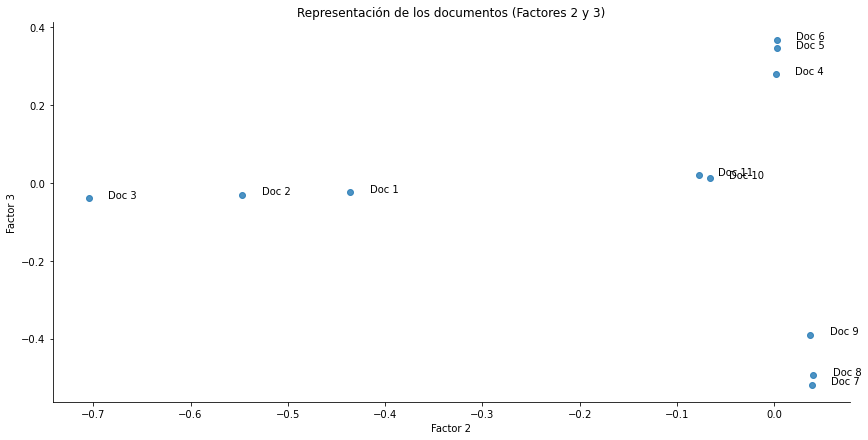

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'f2': V_matrix[:,1], 'f3': V_matrix[:,2],
                   'group': ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]})

sns.lmplot(data = df, x= "f2" , y = "f3", fit_reg=False, height=6, aspect=2)

plt.title('Representación de los documentos (Factores 2 y 3)')
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
label_point(df.f2, df.f3, df.group, plt.gca())

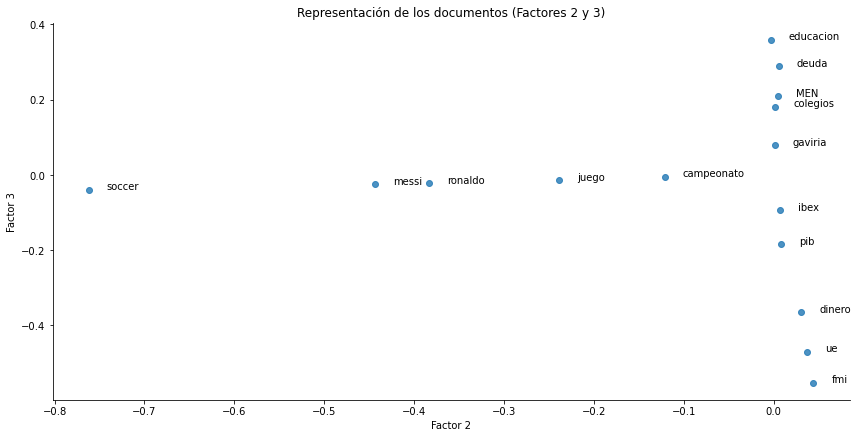

In [16]:
df = pd.DataFrame({'f2': U_matrix[:,1], 'f3': U_matrix[:,2],
                   'group': [word for word in dictionary.token2id.keys()]})

sns.lmplot(data = df, x= "f2" , y = "f3", fit_reg=False, height=6, aspect=2)

plt.title('Representación de los documentos (Factores 2 y 3)')
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
label_point(df.f2, df.f3, df.group, plt.gca())

Gensim nos muestra una fórmula por tema.

- Esta indica el grado de pertenencia a un determinado tema 

- El valor más grande hay más posibildidad de aparcer en ese tema

In [17]:
lsi_model.print_topics()

[(0,
  '0.451*"educacion" + 0.423*"deuda" + 0.377*"colegios" + 0.346*"MEN" + 0.346*"fmi" + 0.293*"ue" + 0.268*"gaviria" + 0.255*"dinero" + 0.100*"pib" + 0.046*"ibex"'),
 (1,
  '-0.762*"soccer" + -0.443*"messi" + -0.383*"ronaldo" + -0.238*"juego" + -0.121*"campeonato" + 0.044*"fmi" + 0.037*"ue" + 0.031*"dinero" + 0.008*"pib" + 0.007*"ibex"'),
 (2,
  '-0.552*"fmi" + -0.470*"ue" + -0.365*"dinero" + 0.359*"educacion" + 0.289*"deuda" + 0.209*"MEN" + -0.183*"pib" + 0.182*"colegios" + -0.093*"ibex" + 0.079*"gaviria"')]

# Ejemplo

- Podemos asignar un tema a un documento nuevo

- Se debe calcular los fcatores latentes del nuevo documento en función del vector de apariciones de palabras y calcular la similaridad con el resto de documentos en función de sus factores latentes.

- Usamos la fórmula

$$FactoresLatentes(new) = VectorPalabras(new). U_k S^{-1}$$

In [18]:
new_doc = "soccer soccer messi colegios educacion educacion educacion MEN"
new_vec = dictionary.doc2bow(new_doc.split())

In [19]:
# Obtenemos los factores latentes del nuevo documento
vec_lsi = lsi_model[new_vec]

pd.DataFrame(vec_lsi, index=['Topic 1', 'Topic 2', 'Topic 3'], columns=['', 'Valor']).head()

,,Valor
Topic 1,0,2.15
Topic 2,1,-1.97
Topic 3,2,1.36


Luego calculamos las similaridades entre documentos

In [20]:
from gensim import similarities

# Calcular las similaridades
index = similarities.MatrixSimilarity(lsi_model[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

pd.DataFrame(sims, columns=['Documento (indice)', 'Similaridad']).head(11)

,Documento (indice),Similaridad
0,10,0.96
1,9,0.94
2,5,0.79
3,3,0.79
4,4,0.79
5,2,0.61
6,1,0.61
7,0,0.61
8,8,0.16
9,7,0.04


Vemos que tiene mayor similaridad con los documentos 0, 1 y 2 que hablan de soccer.

# LDA: Latent Dirichlet Allocation


* El LDA, es un ***modelo probabilístico*** que se enmarca dentro de los ***modelos generativos*** ya que trata de describir como se crea un documento. (http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)


* El LDA propone que ***un documento se crea mediante la selección de los temas y las palabras de acuerdo a las representaciones probabilísticas del texto natural del documento***.


* El LDA calcula **dos matrices de probabilidad P(w|z) y P(z|θ)**, donde:

    - **P(w|z)**: es la probabilidad de que dado un tema salga una palabra
    - **P(z|θ)**: es la probabilidad de que un documento pertenezca a un tema.
    
$$ P(w|\theta) = \sum_{z \in  Z} P(w | z) \cdot P(z|\theta) $$


* La representación en "*Plate Notation*" o notación de placas del LDA es la siguiente:

<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/LDA.png?raw=true" alt="centered image" width="500" height="300"></center>

* Donde

    + ***$K$***: Número de temas. 
    + ***$N$***: Número de palabras
    + ***$M$***: Número de documentos: 
    + ***$\alpha$***: Parámetro de Dirichlet. Este parámetro es un vector de $K$ componentes que describe el conocimiento a priori que se tiene sobre como los temas se distribuyen en los documentos. 
        * Pocos temas -> Valor de $\alpha$ pequeño
        * Muchos temas  -> Valor de $\alpha$ grande
    + ***$\beta$***: Parámetro de Dirichlet. Este parámetro es un vector de $N$ componentes que describe el conocimiento a priori que se tiene sobre como las palabras se distribuyen en cada tema. 
        * Tema con pocas palabras -> Valor de $\beta$ cercano a cero
        * Tema con muchas palabras -> Valor de $\beta$ cercano a uno
    + ***$\theta$***: Distribución de probabilidad de que un documento pertenezca a un tema. 
    + ***$Z$***: Distribución de probabilidad de que una palabra pertenezca a un tema. 
    + ***$W$***: Identifica todas las palabras en todos los documentos.
    + ***$\varphi$***: Distribución de probabilidad de que dado un tema salga una palabra.
    
* Haciendo la comparación con el LSI, el ***LDA nos tienen que proporcionar***:
    - Matriz de probabilidades "***Temas-Palabras***": Nos indica la probabilidad de que dado un tema, salga una palabra. 
    - Matriz de probabilidades "***Documentos-Temas***": Nos indica la probabilidad de que un documento pertenezca a un tema.
    
    
* De esta manera podemos ver las relaciones entre palabras y entre documentos.


* ***OBSERVACIÓN IMPORTANTE***: *El LDA trabaja con distribuciones de probabilidad que representan la probabilidad de pertenencia de cada palabra o documento a cada tema. Estas distribuciones de probabilidad no tienen que ser tratadas como vectores de factores latentes (como en el LSI) para calcular similaridades entre documentos, ya que al tratarse de distribuciones de probabilidad no hay que aplicar medidas de distancias para calcular similaridades; si no la ***Divergencia de Kullback-Liebler (KL)*** para estudiar las similaridades entre distribuciones de probabilidad.*


$$ KL(p ||q) = \sum_{i}p(i)ln \frac{p(i)}{q(i)} $$

Vamos a revisar el ejemplo que hicimos con LSI, ahora con LDA es con probabilidades y la distancia de logaritmo, encambio LSI es con Frecuencias y distancia euclidiana.

In [21]:
documento = ["juego juego juego soccer soccer campeonato campeonato campeonato ronaldo ronaldo ronaldo ronaldo ronaldo messi",
      "soccer soccer soccer soccer soccer ronaldo ronaldo ronaldo ronaldo messi messi",
      "juego juego soccer soccer soccer soccer soccer soccer soccer messi messi messi messi messi",
      "educacion educacion educacion educacion MEN MEN MEN MEN MEN MEN gaviria gaviria gaviria gaviria gaviria",
      "educacion educacion educacion educacion MEN MEN MEN deuda deuda deuda deuda colegios colegios colegios gaviria",
      "educacion educacion educacion educacion deuda deuda deuda deuda deuda deuda colegios colegios colegios colegios colegios",
      "dinero fmi fmi fmi fmi fmi ue ue ue ue pib pib pib ibex ibex",
      "colegios gaviria dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ue pib",
      "MEN deuda colegios gaviria dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ",
      "soccer educacion pib",
      "soccer colegios campeonato gaviria"]

Bolsa de palabras

In [22]:
# Tokenizamos
document = [word.split() for word in documento]

# Creamos el diccionario (vocabulario)
frequency = defaultdict(int)
for doc in documents:
    for token in doc:
        frequency[token] += 1
        
documents = [[token for token in doc] for doc in documents]
dictionary = corpora.Dictionary(documents)
print('Diccionario:')
pprint(dictionary.token2id)

# Creamos la Bolsa de Palabras
corpus = [dictionary.doc2bow(doc) for doc in documents]
print('\nBolsa de Palabras:')
pprint(corpus)

Diccionario:
{'MEN': 5,
 'campeonato': 0,
 'colegios': 8,
 'deuda': 9,
 'dinero': 10,
 'educacion': 6,
 'fmi': 11,
 'gaviria': 7,
 'ibex': 12,
 'juego': 1,
 'messi': 2,
 'pib': 13,
 'ronaldo': 3,
 'soccer': 4,
 'ue': 14}

Bolsa de Palabras:
[[(0, 3), (1, 3), (2, 1), (3, 5), (4, 2)],
 [(2, 2), (3, 4), (4, 5)],
 [(1, 2), (2, 5), (4, 7)],
 [(5, 6), (6, 4), (7, 5)],
 [(5, 3), (6, 4), (7, 1), (8, 3), (9, 4)],
 [(6, 4), (8, 5), (9, 6)],
 [(10, 1), (11, 5), (12, 2), (13, 3), (14, 4)],
 [(7, 1), (8, 1), (10, 4), (11, 4), (13, 1), (14, 4)],
 [(5, 1), (7, 1), (8, 1), (9, 1), (10, 4), (11, 4), (14, 3)],
 [(4, 1), (6, 1), (13, 1)],
 [(0, 1), (4, 1), (7, 1), (8, 1)]]


## Generación del Modelo:

* Gensim tiene implementado el LDA en la clase ***LdaModel***: https://radimrehurek.com/gensim/models/ldamodel.html


* Como parámetros relevantes necesita:
    1. Corpus
    2. Número de Topics
    3. Diccionario o Vocabulario del Corpus

In [23]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus=corpus, 
                     num_topics=3, 
                     id2word=dictionary, 
                     random_state=168)

## Matriz de probabilidades "***Documentos-Temas***" - Matriz U 

* Obtenemos la probabilidad de que cada documento pertenezca a uno de los 3 temas de la siguiente manera:

In [24]:
import numpy as np
docs_topics = np.array([[tup[1] for tup in lst] for lst in lda_model[corpus]])
docs_topics

array([[0.9554735 , 0.02226917, 0.02225735],
       [0.9443553 , 0.0278324 , 0.02781233],
       [0.955479  , 0.02226874, 0.02225227],
       [0.02358868, 0.95468956, 0.02172177],
       [0.02161127, 0.9571557 , 0.02123299],
       [0.02107015, 0.95780784, 0.02112204],
       [0.02093267, 0.02089469, 0.9581726 ],
       [0.02132919, 0.02236205, 0.9563087 ],
       [0.02175598, 0.10594875, 0.87229526],
       [0.47131318, 0.26471367, 0.26397318],
       [0.66139346, 0.26845714, 0.07014938]], dtype=float32)

Se puede observar que:

- Devuelve para cada documento la probabilidad de que el documento pertenezca a cada tema y que es un vector de probabilidades ya que la suma de las probabilidades es igual a $1$.

- Para ver los factores de cada una de las palabras se hace lo siguiente:

In [25]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
index = ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]
pd.DataFrame(docs_topics, index=index, columns=['Topic 1', 'Topic 2', 'Topic 3']).head(11)

,Topic 1,Topic 2,Topic 3
Doc 1,0.96,0.02,0.02
Doc 2,0.94,0.03,0.03
Doc 3,0.96,0.02,0.02
Doc 4,0.02,0.95,0.02
Doc 5,0.02,0.96,0.02
Doc 6,0.02,0.96,0.02
Doc 7,0.02,0.02,0.96
Doc 8,0.02,0.02,0.96
Doc 9,0.02,0.11,0.87
Doc 10,0.47,0.26,0.26


*Tarea: Corran el LDA 2500 documentos de 50 o 100*

## Matriz de probabilidades "***Temas-Palabras***" - Matriz V


* Obtenemos la probabilidad de que dado uno de los 3 temas aparezca una de las 15 palabras. Al igual que en la matriz anterior la suma de todas las probabilidades de las palabras en un tema tiene que sumar $1$.


* A continuación obtenemos la probabilidad de que dado un tema aparezca una palabra:

In [26]:
words_topics = lda_model.get_topics()
words_topics

array([[0.07191384, 0.08909308, 0.13870065, 0.15540095, 0.26856995,
        0.06613762, 0.05746238, 0.08111635, 0.02175318, 0.00639754,
        0.00625349, 0.00662618, 0.0057096 , 0.01868422, 0.00618097],
       [0.00883434, 0.00860135, 0.00886778, 0.00929843, 0.01410442,
        0.13715622, 0.24607542, 0.06816371, 0.20073204, 0.24763939,
        0.0089917 , 0.009497  , 0.00826988, 0.01391835, 0.00985007],
       [0.00720722, 0.00698804, 0.00781871, 0.00761892, 0.00916188,
        0.02773269, 0.0079182 , 0.04699612, 0.04775178, 0.02722945,
        0.18444683, 0.2632963 , 0.046198  , 0.08595766, 0.22367825]],
      dtype=float32)

Colocamos los resultados en una tabla

In [27]:
pd.DataFrame(words_topics, index=['Topic 1', 'Topic 2', 'Topic 3'], columns=dictionary.token2id.keys()).head()

,campeonato,juego,messi,ronaldo,soccer,MEN,educacion,gaviria,colegios,deuda,dinero,fmi,ibex,pib,ue
Topic 1,0.07,0.09,0.14,0.16,0.27,0.07,0.06,0.08,0.02,0.01,0.01,0.01,0.01,0.02,0.01
Topic 2,0.01,0.01,0.01,0.01,0.01,0.14,0.25,0.07,0.20,0.25,0.01,0.01,0.01,0.01,0.01
Topic 3,0.01,0.01,0.01,0.01,0.01,0.03,0.01,0.05,0.05,0.03,0.18,0.26,0.05,0.09,0.22


## Palabras (terminos) más representativas de un tema (topic)

Dado que podemos obtener la probabilidad de que dada una palabra (termino) esta pertenezca a un tema (topic), podemos obtener las palabras más representativas por topic de la siguiente manera:

In [28]:
dictionary.id2token
for i in range(3):
    print('\nTopic {i}'.format(i=i+1))
    pprint([dictionary.id2token[term[0]] for term in lda_model.get_topic_terms(i)[0:5]])


Topic 1
['soccer', 'ronaldo', 'messi', 'juego', 'gaviria']

Topic 2
['deuda', 'educacion', 'colegios', 'MEN', 'gaviria']

Topic 3
['fmi', 'ue', 'dinero', 'pib', 'colegios']


## Temas y Palabras

* Gensim nos devuelve un "formula" por tema (Topic) que aplicada a las apariciones de las palabras en los documentos nos indica la pertenencia del nuevo documento a ese tema. El que mayor valor tenga tras aplicar la fórmula del tema al documento significará que tiene mayor propensión a pertenecer a ese tema.

* Esa fórmula la construye como el sumatorio de la aparición de la palabra en el documento, multiplicado por la probabilidad de que en ese temá aparezca esa palabra:

In [29]:
lda_model.print_topics(num_words=15)

[(0,
  '0.269*"soccer" + 0.155*"ronaldo" + 0.139*"messi" + 0.089*"juego" + 0.081*"gaviria" + 0.072*"campeonato" + 0.066*"MEN" + 0.057*"educacion" + 0.022*"colegios" + 0.019*"pib" + 0.007*"fmi" + 0.006*"deuda" + 0.006*"dinero" + 0.006*"ue" + 0.006*"ibex"'),
 (1,
  '0.248*"deuda" + 0.246*"educacion" + 0.201*"colegios" + 0.137*"MEN" + 0.068*"gaviria" + 0.014*"soccer" + 0.014*"pib" + 0.010*"ue" + 0.009*"fmi" + 0.009*"ronaldo" + 0.009*"dinero" + 0.009*"messi" + 0.009*"campeonato" + 0.009*"juego" + 0.008*"ibex"'),
 (2,
  '0.263*"fmi" + 0.224*"ue" + 0.184*"dinero" + 0.086*"pib" + 0.048*"colegios" + 0.047*"gaviria" + 0.046*"ibex" + 0.028*"MEN" + 0.027*"deuda" + 0.009*"soccer" + 0.008*"educacion" + 0.008*"messi" + 0.008*"ronaldo" + 0.007*"campeonato" + 0.007*"juego"')]

Vamos a ver la visualización de lo anterior

# Visualización

* La librería llamada "***pyLDAvis***" nos permite visualizar las relaciones entre los temas (topic) y dentro de cada tema la importancia de sus palabras (terms).

* La parte de visualización de esta librería nos permite ver:
    - Parte Izquierda: Visualización de los temas en función de dos componentes (2 Dimensiones)
    - Parte Derecha: Seleccionado un Topic, podemos ver las palabras (terms) más relevantes de ese tema y la frecuencia con la que aparecen tanto en el corpus como en el tema.
    
    * En esta visualización podemos apreciar como se distinguen los tres temas claramente ya que las dos componentes que las definen son claramente distintas.

In [30]:
pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [31]:
import pyLDAvis
import pyLDAvis.gensim

vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\prestamour\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# Selección del número óptimo de Topics (coherencia)

* Dado que las técnicas de "*Topic Modeling*" (tanto LSI como LDA) ***generan automáticamente 'N' temas (Topics)*** a partir de los documentos del corpus ***de forma no supervisada***, tenemos que evaluar de alguna manera si los temas que genera son "***Coherentes***" entre sí; es decir, si hay dos o más temas que son tan similares entre sí que podrían formar un tema o si hay temas que son muy genéricos y que podrían dividirse en dos o más temas.

* Este es un problema común que también tenemos las personas a la hora de asignar un tema a un texto ya que se trata de una tarea que en ocasiones puede ser muy subjetiva.

* Por esta razón es necesario cuantificar un nivel de ***Coherencia*** sobre la segmentación realizada.

* Para hacer una analogía con Clustering, la ***Coherencia*** en el Topic Modeling viene a ser como la ***Inercia*** en el K-Means.

* La ***Coherencia*** es por tanto una medida que ***nos sirve para ver lo bien o mal que están definidos los temas (Topics) por sus palabras (Terms) más representativas del Topic***.

* Para más información ver el siguiente artículo: http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf


### ¿Como se calcula la Coherencia?


* La coherencia de un modelo se calcula dadas las 'N' palabras más relevantes de un tema (Topic) como:


$$ coherence = \sum_{i>j} score(w_{i},w_{j})$$


* Siendo w<sub>i</sub> y w<sub>j</sub> dos pares de palabras relevantes del tema (Topic).


* Existen dos métodos para el cálculo del ***score*** de la coherencia que son:
    - Extrinsic UCI measure
    - Intrinsic UMass measure
   
   
* Antes de explicar como se calcula el score definimos:

    - **D**: Número de documentos del corpus.
    - **D(w<sub>i</sub>)**: Número de documentos en el que aparece la palabra w<sub>i</sub> en el corpus.
    - **D(w<sub>i</sub>, w<sub>j</sub>)**: Número de documentos en el que aparecen conjuntamente las palabras w<sub>i</sub> y w<sub>j</sub> en el corpus.
    - **p(w<sub>i</sub>)**: Probabilidad de que aparezca la palabra w<sub>i</sub> en un documento del corpus:
    
    $$p(w_{i}) = \frac{D(w_{i})}{D}$$
    
    - **p(w<sub>i</sub>, w<sub>i</sub>)**: Probabilidad de que aparezcan conjuntamente las palabras w<sub>i</sub> y w<sub>j</sub> en un documento del corpus:
    
    $$p(w_{i}, w_{j}) = \frac{D(w_{i}, w_{j})}{D}$$
    
* ***Score: Extrinsic UCI measure***
    
    $$score_{c\_uci} (w_{i}, w_{j}) = log \frac{p(w_{i},w_{j})}{p(w_{i}) p(w_{j})}$$


* ***Score: Intrinsic UMass measure***
    
    $$score_{c\_mass} (w_{i}, w_{j}) = log \frac{D(w_{i},w_{j}) + 1}{D(w_{i})}$$
    
    


# Taller para iniciar en clase


* Vamos a considerar el siguiente conjunto de documentos ***obtener los temas (Topics) de una serie de artículos (noticias)*** que está etiquetados con un tema (el corpus tiene 20 temas).

- El fichero en formato Json contiene una serie de documento en los que le asigna una temática.

- Cada elemento del Json contiene:
    - **content**: Contenido del artículo
    - **target**: Identificador del target
    - **target_names**: Nombre del target


* ***IMPORTANTE***: *Esto es aprendizaje no supervisado, por lo que no tenemos que tener en cuentas los temas en los que alguien (un humano experto) ha clasificado estos textos. La idea del ejercicio es la de obtener los temas distintos de los que hablan los artículos (***Clusterizar artículos***) y nos es útil saber a priori el número de temas distintos que puede tener, pero en ningún caso el target de los artículos entraria al algoritmo de aprendizaje (LDA en este caso)*

* Para realizar este ejercicio se seguirán los siguientes pasos

1. Carga de datos
2. Exploración de los datos y entendimiento del conjunto de datos
3. Interprete el siguiente código

```
df.groupby(['target', 'target_names']).count()
```
4. Para la Normalización utilizar ***spaCy*** y realizar las siguientes acciones en una sola función

    4.1. Pasar las frases a minúsculas.

    4.2. Eliminar los signos de puntuación.

    4.3. Eliminar las palabras con menos de 3 carácteres.

    4.4. Eliminar las palabras con mas de 12 carácteres.

    4.5. Eliminar las Stop-Words.

    4.6. Eliminar los emails

    4.7. Eliminar los saltos de línea

    4.8. Eliminar las comillas simples

    4.9. Filtrar las palabras que no sean Nombre, Adjetivo, Verbo o Adverbio

    4.10. Pasar la palabra a su lema

5. Crear del diccionario y la bolsa de palabras

    5.1 Corpus tokenizado: "*documents_tok*"

    5.2 Diccionario: "*dictionary*"

    5.3 Corpus: "*corpus*' que es la bolsa de palabras de gensim

6. Creacción del modelo

    6.1 Crear un modelo con 20 temas

    6.2 Utilice la instrucción "chunksize=100". ¿Qué efecto tiene?

7. Visualización. 

    7.1 Visualizar los resultados con la librería de *pyLDAvis*

    7.2 ¿Qué puede concluir de la visualización?

8. ¿Qué sucede si seleccionó 12, 15, 17 temas? Haga la visualización en estos casos. ¿Cuál es mejor?


In [32]:
url= "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/base_LDA.json"